In [2]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv("virus.csv",parse_dates=['Date'])

In [4]:
data

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

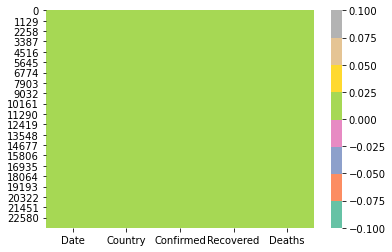

In [6]:
sns.heatmap(data.isnull(),cmap='Set2')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       23688 non-null  datetime64[ns]
 1   Country    23688 non-null  object        
 2   Confirmed  23688 non-null  int64         
 3   Recovered  23688 non-null  int64         
 4   Deaths     23688 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 925.4+ KB


In [8]:
# from the above it is clear that we dont have any null values and we need to change the date fromat 

In [9]:
data.dtypes

Date         datetime64[ns]
Country              object
Confirmed             int64
Recovered             int64
Deaths                int64
dtype: object

In [10]:
# Splitting the date for analysis purpose
data_date=pd.DataFrame()
data_date['year']=data['Date'].dt.year
data_date['month']=data['Date'].dt.month_name()
data_date['day']=data['Date'].dt.day_name()
data_date['Deaths']=data['Deaths']
data_date

,year,month,day,Deaths
0,2020,January,Wednesday,0
1,2020,January,Wednesday,0
2,2020,January,Wednesday,0
3,2020,January,Wednesday,0
4,2020,January,Wednesday,0
...,...,...,...,...
23683,2020,May,Tuesday,3
23684,2020,May,Tuesday,1
23685,2020,May,Tuesday,49
23686,2020,May,Tuesday,7


In [11]:
# cehcking number of distinct year
data_date['year'].drop_duplicates()
data_date

,year,month,day,Deaths
0,2020,January,Wednesday,0
1,2020,January,Wednesday,0
2,2020,January,Wednesday,0
3,2020,January,Wednesday,0
4,2020,January,Wednesday,0
...,...,...,...,...
23683,2020,May,Tuesday,3
23684,2020,May,Tuesday,1
23685,2020,May,Tuesday,49
23686,2020,May,Tuesday,7


In [12]:
# adding one more coulumn to check it is weekday or weekend
import numpy as np
data_date['type_of_day']=np.where((data_date['day']=='Sunday')|(data_date['day']=='Saturday'),'weekend','weekday')

In [13]:
data_date

,year,month,day,Deaths,type_of_day
0,2020,January,Wednesday,0,weekday
1,2020,January,Wednesday,0,weekday
2,2020,January,Wednesday,0,weekday
3,2020,January,Wednesday,0,weekday
4,2020,January,Wednesday,0,weekday
...,...,...,...,...,...
23683,2020,May,Tuesday,3,weekday
23684,2020,May,Tuesday,1,weekday
23685,2020,May,Tuesday,49,weekday
23686,2020,May,Tuesday,7,weekday


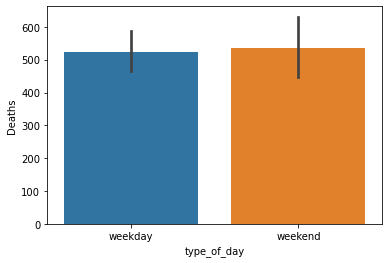

In [14]:
# analysing with visuals 
sns.barplot(x='type_of_day',y='Deaths',data=data_date)

from this is is clear that the type of day isnt affecting the deaths equal amount  are dying 

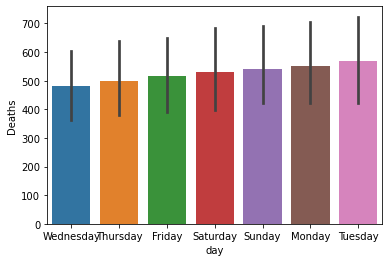

In [15]:
sns.barplot(x='day',y='Deaths',data=data_date)

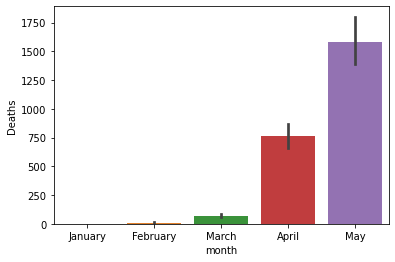

In [16]:
sns.barplot(x='month',y='Deaths',data=data_date)

From this it is clear that the number of deaths are increasing highly from april and increasing in may 
and the number of cases highest in tuesday 

In [17]:
data_date.drop('type_of_day',axis=1)

,year,month,day,Deaths
0,2020,January,Wednesday,0
1,2020,January,Wednesday,0
2,2020,January,Wednesday,0
3,2020,January,Wednesday,0
4,2020,January,Wednesday,0
...,...,...,...,...
23683,2020,May,Tuesday,3
23684,2020,May,Tuesday,1
23685,2020,May,Tuesday,49
23686,2020,May,Tuesday,7


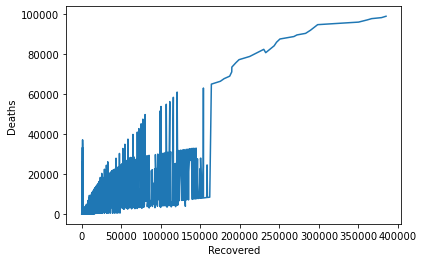

In [18]:
sns.lineplot(x='Recovered',y='Deaths',data=data)

In [19]:
data

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


In [20]:
import sklearn
from sklearn import preprocessing

In [21]:
l=preprocessing.LabelEncoder()

In [22]:
data['Country']=l.fit_transform(data['Country'])

In [23]:
data

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,0,0,0,0
1,2020-01-22,1,0,0,0
2,2020-01-22,2,0,0,0
3,2020-01-22,3,0,0,0
4,2020-01-22,4,0,0,0
...,...,...,...,...,...
23683,2020-05-26,183,429,365,3
23684,2020-05-26,184,9,6,1
23685,2020-05-26,185,249,10,49
23686,2020-05-26,186,920,336,7


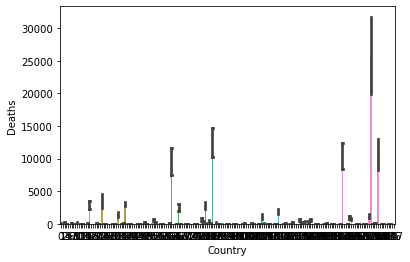

In [24]:
sns.barplot(x='Country',y='Deaths',data=data, capsize=0.25)

66th country has the highest number of deaths 

In [25]:
data.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,0,0,0,0
1,2020-01-22,1,0,0,0
2,2020-01-22,2,0,0,0
3,2020-01-22,3,0,0,0
4,2020-01-22,4,0,0,0


In [26]:
data.drop(columns='Date',inplace=True)

In [27]:
data.head()

,Country,Confirmed,Recovered,Deaths
0,0,0,0,0
1,1,0,0,0
2,2,0,0,0
3,3,0,0,0
4,4,0,0,0


In [28]:
from scipy.stats import zscore
z_score=abs(zscore(data))
print(data.shape)
data_final=data.loc[(z_score<3).all(axis=1)]
print(data_final.shape)

(23688, 4)
(23177, 4)


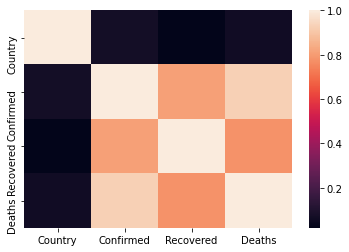

In [29]:
# outliers are removed in the final data 
sns.heatmap(data.corr())

In [30]:
data.describe()

,Country,Confirmed,Recovered,Deaths
count,23688.000000,2.368800e+04,23688.000000,23688.000000
mean,93.500000,7.969368e+03,2581.801714,526.935030
std,54.271303,5.842109e+04,15143.101257,3992.815956
min,0.000000,0.000000e+00,0.000000,0.000000
25%,46.750000,0.000000e+00,0.000000,0.000000
50%,93.500000,1.800000e+01,1.000000,0.000000
75%,140.250000,7.300000e+02,123.000000,13.000000
max,187.000000,1.680913e+06,384902.000000,98913.000000


In [31]:
df_x=data_final.drop(columns= ['Deaths'])
y=data_final.iloc[:,-1]

In [32]:
# now we are scaling the variables so that all have similar datatype
import sklearn
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [33]:
x

,Country,Confirmed,Recovered
0,-1.720424,-0.265296,-0.233732
1,-1.701984,-0.265296,-0.233732
2,-1.683544,-0.265296,-0.233732
3,-1.665105,-0.265296,-0.233732
4,-1.646665,-0.265296,-0.233732
...,...,...,...
23172,1.654021,-0.221597,-0.126634
23173,1.672460,-0.264379,-0.231972
23174,1.690900,-0.239932,-0.230798
23175,1.709339,-0.171582,-0.135143


In [34]:

y

0         0
1         0
2         0
3         0
4         0
         ..
23683     3
23684     1
23685    49
23686     7
23687     4
Name: Deaths, Length: 23177, dtype: int64

In [35]:
y.shape

(23177,)

In [36]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=7)

In [37]:
# importing models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [38]:
knn=KNeighborsClassifier(n_neighbors=7)
svc=SVC()
dtc=DecisionTreeClassifier(random_state=7)
gb=GaussianNB()

In [39]:
models=[]
models.append(('K neighbors',knn))
models.append(('Support vector machine',svc))
models.append(('Decision tree classifier',dtc))
models.append(('Gaussian ',gb))


In [40]:
models

[('K neighbors', KNeighborsClassifier(n_neighbors=7)),
 ('Support vector machine', SVC()),
 ('Decision tree classifier', DecisionTreeClassifier(random_state=7)),
 ('Gaussian ', GaussianNB())]

In [41]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


In [42]:
from sklearn.model_selection import cross_val_score

In [ ]:
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('********',name,'******')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    As=accuracy_score(y_test,pre)
    score.append(As*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross validation score is =',sc)
    cvs.append(sc*100)
    
    print('\n')
    
  
    
    
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    
    
    print('\n\n')
    
    

******** K neighbors ******


KNeighborsClassifier(n_neighbors=7)






C:\Users\Akhileshwar Reddy\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Cross validation score is = 0.6747264749462185


[[3785    9    1 ...    0    0    0]
 [  93  276    8 ...    0    0    0]
 [  43   23  128 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]





******** Support vector machine ******


SVC()






C:\Users\Akhileshwar Reddy\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


In [ ]:
op=[svc,knn,dtc,gb]
for x in op:
    
    x.fit(x_train,y_train)
    print(x)
    pre=x.predict(x_test)
    As=accuracy_score(y_test,pre)
    print(As)

In [ ]:

import joblib
joblib.dump(dtc,'Corona_last.ipynb')